# Optimization -  Duality

> Lagrangian Duality, Weak and Strong Duality, Optimality Conditions, Farkas' Lemma, and Theorems of the Alternative

- hide: false
- toc: true
- badges: true
- comments: true
- categories: ['Optimization','Applied Mathematics','Proofs']

# Introduction

Every convex optimization problem, designated as the ***primal***, has a related problem called its ***dual*** which can be colloquially thought of as its evil twin. The primal and the dual represent two different perspectives on the same problem. 

In the most general case, if the primal is a minimization problem, its dual is a maximization problem. In the case of constrained optimization, if the primal is minimization in $n$ variables and $m$ constraints then its dual is a maximization in $m$ variables and $n$ constraints. 

Furthermore, *any* feasible value of the dual is a lower-bound for *all* feasible values of the primal. In particular, should they both exist, the dual optimum is a lower bound for the primal optimum. This property, called ***weak duality***, is at the core of ***duality theory***. Having a problem that obtains, at the very least, a useful lower-bound for the primal optimum and, possibly, the primal optimum itself is the nascent idea of formulating the dual.

In the best case scenario, problems exhibit a property called ***strong duality***, which guarantees the primal and the dual optima agree with each other. Strongly dual problems include, but are not limited to, all linear programs and a category of convex non-linear optimization problems. For such problems, solving the dual guarantees that we've also solved the primal. Furthermore, taking the dual of the dual gives back the primal. So this relationship is true in the converse — if we've solved the primal then we've also solved its dual.

This is what makes duality theory so useful in practice. Having a related, usually easier, optimization problem gives applied scientists a huge computational advantage. However, even if the dual does not turn out to be any easier to solve or strong duality fails to hold, we still stand to gain structural insights about the primal problem.

In this post we will show how the dual of a problem arises, we will examine in detail its relationship with the primal, and list all possible primal-dual outcomes. In doing so, we will look at duality in the general case of constrained optimization problems, in the specific case of linear programs, and in a certain category of unconstrained problem.

# The Dual of a Constrained Problem

First, let's focus on deriving the dual of a constrained optimization problem. We shall see that, in a sense, constraints are what give rise to duality through the [Lagrangian](https://en.wikipedia.org/wiki/Lagrangian_relaxation). Certain types of unconstrained problems also have duals which arise from introducing dummy constraints or directly through the [Fenchel-Legendre Transform](https://en.wikipedia.org/wiki/Convex_conjugate).

Take the most general form of a convex, constrained problem with $m$ inequality and $n$ equality constraints. To make the discussion interesting, assume the problem is non-trivial (i.e. its constraint set is non-empty and contains more than one feasible point). Furthermore, so that we may have a solution to speak of, assume the problem is bounded with the finite optimum $f_0(x^*)$ for some optimizer $x^*$.

<br>
$$
\begin{aligned}
\min_x &: f_0(x)
\\
s.t. &: \begin{aligned} &f_i(x) \leq 0 \ \ i = 1, ...,m
\\ 
&h_i(x) = 0 \ \ i = 1, ... ,p
\end{aligned}
\end{aligned} \tag{P}
$$
<br>

> Note: The $f_i$'s and the $h_i$'s in the constraints must necessarily be convex in order for their sublevel-sets, and hence the problem itself, to be convex. However, the equality constraints may be given as $Ax = b$ in some other sources. These representations are almost equivalent. The $0$-th level-set of $Ax - b$ is indeed a convex set. However, $h_i$'s in the equality constraints $h_i(x) = 0$ need not be linear for the their $0$-th level-set $\{ x : h_i(x) = 0 \}$ to be convex. For example, in $\mathbb{R}$, $x^2 = 0$ does represent a convex level-set. Note, however, that $x^2 = 0$ can be reduced to $x = 0$ which is, indeed, linear. The notion of [quasi-linearity](https://en.wikipedia.org/wiki/Quasiconvex_function) is what's needed here but, in practice, we simply *define* a general convex problem as having only linear equality constraints. Doing so assists in the analysis of problems and in the development of computational methods.

Since optimizing an unconstrained problem is considerably easier than optimizing a constrained problem, we seek to augment the constrained problem into an equivalent unconstrained problem. 

The idea is to penalize infeasible $x$ using functions that express our *displeasure* for certain choices. 

At first we use the *infinitely-hard penalty functions* $\mathbb{1}_-$ and $\mathbb{1}_0$ which are defined as follows:

<br>
$$\mathbb{1}_-(u) = 
\begin{cases}
\begin{aligned} 
&0  &\textrm{if} \ u \leq 0
\\
&\infty  &\textrm{if} \ u > 0
\end{aligned}
\end{cases}$$
<br>
$$\mathbb{1}_0(u) = 
\begin{cases}
\begin{aligned} 
&0  &\textrm{if} \ u = 0
\\
&\infty  &\textrm{if} \ u \ne 0
\end{aligned}
\end{cases}$$
<br>

Then the equivalent unconstrained problem can be stated as:

<br>
$$\min_x: \mathcal{J}(x)$$
<br>

where $\mathcal{J}(x) = f_0(x) + \sum_{i=1}^m \mathbb{1}_-(f_i(x)) + \sum_{i=1}^p \mathbb{1}_0(h_i(x))$. 

Equivalently, we can express the objective $\mathcal{J}(x)$ as:

<br>
$$\mathcal{J}(x) = \begin{cases}\begin{aligned} 
&f_0(x) \ \ \textrm{if $x$ is feasible}
\\
&\infty \ \ \textrm{otherwise}
\end{aligned}\end{cases}$$
<br>

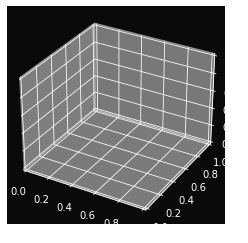

In [12]:
from mpl_toolkits import mplot3d


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_facecolor('#0a0a0a')

Informally, if $\hat x$ is chosen s.t *one or more* of the constraints are broken then the minimization incurs an infinitely positive penalty. Therefore, such a $\hat x$ will never be selected over any feasible choice $x$ which gives a finite value $f_0(x)$. Moreover, by optimality of $x^*$ in the original problem, we have $f_0(x) \leq f_0(x^*) \ \ \forall x$. So, the optimum of $\mathcal{J}(x)$ will also be $f_0(x^*)$.

That is:

<br>
$$\min_x \mathcal{J}(x) = f_0(x^*) \tag{1}$$

Moreover, since the optimizer $x^*$ for the original problem is feasible, $\mathcal{J}(x^*) = f_0(x^*)$ by definition. It follows from $(1)$ that:

<br>
$$\mathcal{J}(x^*) = \min_x \mathcal{J}(x) \tag{2.1}$$ 

Or, equivalently:

<br>
$$x^* = \arg \min_x \mathcal{J}(x) \tag{2.2}$$

$(1)$ says that it suffices to minimize the unconstrained objective $\mathcal{J}(x)$ instead of the original problem since doing so results in $f_0(x^*)$, the optimum of the unconstrained problem. $(2.1)$ and $(2.2)$, on the other hand, say that it suffices to find an optimizer $x^*$ of the unconstrained problem, since such a point will also be an optimizer of the constrained problem.

As we know, the local optima of unconstrained problems occur at their *stationary points* which can be easily identified using the *unconstrained optimality condition*.

> **Unconstrained Optimality Condition** &nbsp; If $x^*$ is an optimizer of the unconstrained objective $f_0(x)$ then $\nabla f_0(x^*) = 0$. That is $x^*$ is a ***stationary point** of $f_0(x)$.

Once the stationary points have been found, a global minimizer can be identified among them simply by evaluating the objective at each stationary point.

However, we're immediately beset by a problem. We cannot find the gradient of $\mathcal{J}(x)$ and set it to zero because the infinitely-hard penalty functions are discontinuous and non-differentiable. That is, $\nabla \mathcal{J}(x)$ simply does not exist.

To sidestep this difficulty we use linear relaxations instead of $\mathbb{1}_-$ and $\mathbb{1}_0$. 


## The Lagrangian, Dual Variables, and the Dual Function

The ***Lagrangian linear relaxation***, sometimes simply referred to as the ***Lagrangian***, is:

<br>
$$\mathcal{L}(x,\lambda,\mu) = f_0(x) + \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \mu_i h_i(x)$$
$$\textrm{where} \ \lambda \geq 0$$ 

We call the $\lambda_i$'s the ***Lagrange multipliers*** corresponding to the inequality constraints, and the $\mu_i$'s those corresponding to the equality constraints. The vectors $\lambda$ and $\mu$, composed of these Lagrange multipliers, are called the ***Lagrange multiplier vectors*** or, for reasons that will soon become apparent, the ***dual variables***. 

> Note: In some sources, the Lagrangian is simply stated as $\mathcal{L}(x,\lambda) = f_0(x) + \sum_{i=1}^n \lambda_i f_i(x)$. Indeed, by separating the equality constraints $h_i(x) = 0$ into $h_i(x) \leq 0$ and $-h_i(x) \leq 0$, we can transform a problem with equality constraints into one with only inequality constraints. So, this formulation of the Lagrangian is still general enough to account for problems with equality constraints.

## A Lagrangian Lower-Bound

Not only does the Lagrangian relax the unconstrained augmentation of the constrained problem, it also plays a natural role in the formulation of the ***dual problem*** as promised.

The first thing to note about the Lagrangian is that the coordinate-wise $\lambda \geq 0$ condition is crucial. This is because, in the event that an inequality constraint is violated, say $f_i(x) > 0$, the corresponding $\lambda_i$ must be non-negative in order to apply a positive penalty to the minimization. 

On the other hand, $\mu$ is free to assume any value since the equality constraints can be violated in either direction and both scenarios must be penalized.

The second thing to note about the Lagrangian is that, even though it applies a positive penalty that scales linearly in the severity of the violation, this penalty is, nevertheless, not as severe as the infinite penalty applied in $\mathcal{J}(x)$. Also, in the Lagrangian, we may actually be *rewarding* feasible choices of $x$ that have margin. That is, in the event that $f_i(x) < 0$, $\lambda_if_i(x)$ is a non-positive reward for the minimization problem. 

All of this is to say that the Lagrangian is a point-wise lower-bound of the unconstrained problem. That is, the following inequality holds:

<br>
$$\mathcal{L}(x,\lambda,\mu) \leq J(x) \ \ \forall x, \lambda \geq 0, \mu \tag{3.1}$$ 

This fact is also true by graphing each of the linear and infinite penalties and noticing that $\lambda_i f_i(x) \leq \mathbb{1}_-(f_i(x))$ and $\mu_i h_i(x) \leq \mathbb{1}_0(h_i(x))$ for all $i$ constraints. 


Taking $\inf$ w.r.t. $x$ of the LHS in $(3.1)$, we obtain something of interest.

<br>
$$\inf_x \mathcal{L}(x,\lambda,\mu) \leq J(x) \ \ \forall x, \lambda \geq 0, \mu \tag{3.2}$$

> Note: The Lagrangian may not attain its $\min$ w.r.t. $x$, in which case the LHS is simply $-\infty$. We shall see later that the assumption of primal boundedness ensures this does not happen. So, from this point on, we will assume the minimum is attained. That is $\inf_x \mathcal{L}(x,\lambda,\mu) = \min_x \mathcal{L}(x,\lambda,\mu)$.

Designating the original problem as the *primal* $(P)$, we call $g(\lambda, \mu) := \min_x \mathcal{L}(x, \lambda, \mu)$ the ***dual function*** because it exhibits the property of weak duality. That is, per $(3.2)$, any feasible value of $g(\lambda, \mu)$ is a lower-bound for any feasible value of the primal. 

Taking min of both sides in $(3.1)$, we have a more specific flavor of weak duality.

<br>
$$g(\lambda,\mu) \leq \min_x \mathcal{J}(x) \ \ \forall \lambda \geq 0, \mu$$

And, since $\mathcal{J}(x^*) = f_0(x^*) = \min_x \mathcal{J}(x)$, we have:

<br>
$$g(\lambda,\mu) \leq f_0(x^*) \ \ \forall \lambda \geq 0, \mu \tag{3.3}$$

That is, any feasible value of the dual is a lower-bound for the primal optimum.

Maximizing both sides of $(3.3)$ by noticing that the RHS is a constant, and by assuming the LHS attains its $\max$ we get an even more specific flavor of weak duality.

<br>
$$\max_{\lambda \geq 0, \mu} g(\lambda,\mu) \leq f_0(x^*) \tag{3.4}$$

That is, the dual optimum is a lower-bound for the primal optimum.

From here we move, quite naturally, to defining the *dual problem* $(D)$.

## The Lagrange Dual Problem

It's natural, to ask what the *tightest* lower bound on the primal optimal value $f_0(x^*)$ is. This amounts to finding the values $\lambda^* \geq 0$, and $\mu^*$ for which $g(\lambda^*, \mu^*)$ is maximized. We call this the ***Lagrange dual problem*** or, simply, the ***dual problem***.

It can be stated as:

<br>
$$
\begin{aligned}
\max_{\lambda, \mu} &: g(\lambda, \mu)
\\
s.t. &: \lambda \geq  0
\end{aligned} \tag{D}
$$
<br>

Looking at the above, it becomes immediately clear why we were motivated to call $\lambda$, and $\mu$ the *dual variables*. They are the variables of the dual problem.

# Weak Duality and Interpretations

We now return to the general setting of constrained optimization.

We've already seen weak duality formulated as $(3.2)$, $(3.3)$, and $(3.4)$. But, there's yet another, more symmetric, formulation of weak duality as a [*Max-Min Inequality*](https://en.wikipedia.org/wiki/Max%E2%80%93min_inequality) which allows us to prove weak duality through a non-optimization lens. 

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal. Then from $(3.4)$ we have weak duality in terms of the primal and dual optima $g(\lambda^*, \mu^*)$ as:

<br>
$$
g(\lambda^*, \mu^*) \leq f_0(x^*) \tag{3.5}
$$

But since $g(\lambda^*, \mu^*)$ is the solution to the dual $(D)$, and $g(\lambda, \mu) = \min_x \mathcal{L}(x, \lambda, \mu)$:

<br>
$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L}(x, \lambda, \mu) \right\} \tag{4.1}$$

Similarly, it can be shown that:

<br>
$$f_0(x^*) = \min_x \left\{ \max_{\lambda \geq 0, mu} \mathcal{L}(x, \lambda, \mu) \right\} \tag{4.2}$$

To see this, note that for some $x$ fixed by the outer minimizer, maximizing the Lagrangian over $\lambda \geq 0$ and $\mu$ recovers $\mathcal{J}(x)$. 

If all of the inequality constraints are respected, that is $f_i(x) \leq 0$ $\forall i$, then, in order to maximize the Lagrangian, the best we can do is set $\lambda_i = 0$ $\forall i$. In case *any* inequality constraint is violated, that is $f_i(x) > 0$ for some $i$, the result of maximizing the Lagrangian can be made $\infty$ by choosing $\lambda_i \rightarrow \infty$ and $\lambda_j = 0$ $\forall j \ne i$. 

Using similar logic, if all equality constraints are respected then $h_i(x) = 0$ $\forall i$. In this case $\mu_i$ can be chosen to be any value. If, on the other hand, some equality constraint is violated then $h_i(x) \ne 0$ for some $i$. By choosing $\mu_i \rightarrow \pm \infty$, where the sign depends on the direction of the violation, the result can be made $\infty$.

Thus we have shown that:

<br>
$$\begin{aligned}\max_{\lambda \geq 0, \mu} \mathcal{L}(x,\lambda,\mu) &= \begin{cases}\begin{aligned} 
&f_0(x) \ \ \textrm{if $x$ is feasible}
\\
&\infty \ \ \textrm{otherwise}
\end{aligned}\end{cases} \\ &= \mathcal{J}(x)\end{aligned}$$

Now, since $x^*$ is the solution to the primal $(P)$ and $\min_x J(x) = f_0(x^*)$ we have $(4.2)$ as promised. 

Then, weak duality can be stated as:

<br>
$$\max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L}(x, \lambda, \mu) \right\} \leq \min_x \left\{ \max_{\lambda \geq 0, mu} \mathcal{L}(x, \lambda, \mu) \right\} \tag{3.6}$$


## The Max-Min Inequality

The Max-Min Inequality makes no assumptions about the function. It's simply true for all functions of the form $f: X \times Y \rightarrow \mathbb{R}$, and it states that:

<br>
$$
\sup_{x\in X} \left\{ \inf_{y\in Y} f(x,y) \right\} \leq \inf_{y\in Y} \left\{ \sup_{x\in X} f(x,y) \right\}
$$

Since no assumption is made on $f$, the inequality also holds for the Lagrangian, $\mathcal{L}$. And, since we're in the special case where the optimal values of the primal $(P)$ and the dual $(D)$ are assumed to exist, the functions attain the respective optima. That is, we can replace $\sup$ and $\inf$ in the inequality with $\max$ and $\min$ which obtains the promised symmetric formulation of weak duality as $(3.6)$.

We can now prove weak duality through a non-optimization lens by proving the Max-Min Inequality.

For any $f$, and $x \in X$, $y \in Y$ we have:

<br>
$$f(x,y) \leq \sup_y f(x,y) \ \ \forall x$$

The right hand side is now only a function of $x$, so minimizing both sides w.r.t. $x$ yields:

<br>
$$ \inf_x f(x,y) \leq \inf_x \left\{ \sup_y f(x,y) \right\} \ \ \forall y$$

The right hand side is now a constant, so maximizing both sides w.r.t. $y$ results in the desired conclusion.

<br>
$$\sup_y \left\{ \inf_x f(x,y) \right\} \leq \inf_x \left\{ \sup_y f(x,y) \right\}$$

> Note: Observe how the Max-Min Inequality proof mirrors the steps taken to obtain $(3.2)$-$(3.4)$ from $(3.1)$. In fact, $(3.1)$ is of form $f(x,y) \leq \sup_y f(x,y) \ \ \forall x$, which is the first step of the Max-Min Inequality proof, since $J(x)$ is, as shown earlier, $\max_{\lambda \geq 0, \mu} L(x, \lambda, \mu)$. 

### Game-Theoretic Interpretation

The Max-Min Inequality is perhaps best understood intuitively as the following game between two adversarial optimizers. 

The LHS of the Max-Min Inequality can be interpreted as the following game. First, the outer maximizer, player $Y$, fixes a $y$. Then, the inner minimizer, player $X$, chooses $x_y = \arg \inf_x f(x,y)$ which depends on the outer's choice of $y$. Suppose $y^* = \arg \inf_y f(x,y)$ is what player $Y$'s choice would have been were it to act independently of the actions of player $X$. We can imagine a scenario in which the score $f(x_{y^*}, y^*)$ is less than the score $f(x_y, y)$ for some other choice of $y$. So, player $Y$ cannot do as well as it would've done independently, whereas player $X$ is free to do its best. Hence, player $X$, the second player, restricts the choices of player $Y$, the first player. 

Hence, if the goal is to score low, then player $X$ has the advantage if it goes second. Conversely, if the goal is to score high player $Y$ has the advantage if it goes second. This is exactly what the Max-Min Inequality says.

# Strong Duality

Strong Duality is the case in which the primal and the dual optimal values agree with strict equality. 
<br>
$$
g(\lambda^*, \mu^*) = f_0(x^*) \tag{SD - 1}
$$

Alternatively, in its Max-Min characterization:
<br>
$$\max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\} = \min_x \left\{ \max_{\lambda \geq 0, \mu} \mathcal{L} (x, \lambda, \mu) \right\} \tag{SD - 2}$$

Optimization problems that exhibit this property are called Strongly Dual. 

In keeping with the game theoretic intuition of Weak Duality, one can imagine a game in which the first player's optimal choice is independent of the second player's actions. In such a game, both players are free to play their best strategies and, consequently, the order of play is not important.

As mentioned briefly in the introduction, Strong Duality gives applied scientists the ability to solve a related, possibly easier, optimization problem instead of the original, possibly difficult, one. As we shall see it also obtains powerful optimality conditions. For these reasons and more, knowing in advance whether or not a problem is Strongly Dual will be useful to us.

We will see that all linear programs are Strongly Dual by a direct proof, but, when it comes to non-linear optimization, Strong Duality is not a general guarantee. The good news is that sufficient conditions for Strong Duality do exist, and will be provided shortly.


## An Easier Dual Problem 

Let's further qualify what we mean when we say Strong Duality gives us a possibly easier problem to solve. 

The primal, possibly non-convex, problem is that of finding the primal optimal value 
<br>
$$f_0(x^*) = \min_x \left\{ \max_{\lambda \geq 0, \mu} \mathcal{L} (x, \lambda, \mu) \right\}$$

But maximizing the Lagrangian over $\lambda \geq 0$, and $\mu$, recovers $J(x)$ which is a non-differentiable objective. So, we cannot use the unconstrained optimality condition in finding its stationary points which is required in the next step.

Meanwhile, the dual problem is that of finding the dual optimal value 
<br>
$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\}$$

Minimizing the Lagrangian over $x$ may still be difficult, but, at least, it lends itself to using the method of unconstrained optimization (i.e. using the unconstrained optimality condition). Moreover, the resulting dual function $g(\lambda, \mu) = \min_x \mathcal{L}(x, \lambda, \mu)$ is a point-wise minimum of linear functions in $\lambda$ and $\mu$, so its always concave in those variables. And, the constraint $\lambda \geq 0$ is simply a linear constraint.  

So, overall, the dual problem is convex maximization which is always easier to solve than a non-convex primal problem. Furthermore, if the primal is convex with more variables than constraints then the dual is also convex with more constraints than variables which makes it an easier problem to solve. 

In these cases, if Strong Duality holds, the dual optimal value $g(\lambda^*, \mu^*)$ we find is guaranteed to be equal to the primal optimal value $f_0(x^*)$. Therefore, we've found an easier approach to the primal problem. If Strong Duality fails to hold then, at least, we've found a useful lower-bound to the primal optimal value. 
    
## Optimality Conditions
    
Strong Duality obtains powerful optimality conditions known as *Stationarity Condition* and *Complementary Slackness*. These are often collected into the [*Karush–Kuhn–Tucker (KKT) Conditions*](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions).

In the absence of Strong Duality the KKT Conditions are necessary but insufficient for optimality. However, for problems which are Strongly Dual the KKT Conditions become a *certificate of optimality*. That is, they are both necessary and sufficient.
    
### Stationarity Condition

In the section titled [An Easier Dual Problem](https://v-poghosyan.github.io/blog/optimization/applied%20mathematics/proofs/2022/02/07/Optimization-LP-Duality.html#An-Easier-Dual-Problem) we mentioned that the dual problem is that of finding the dual optimal value 
<br>
$$g(\lambda^*, \mu^*) = \max_{\lambda \geq 0, \mu} \left\{ \min_x \mathcal{L} (x, \lambda, \mu) \right\}$$

We mentioned that deriving the dual function, and then solving the dual problem obtains the primal optimal value $f_0(x^*)$ by Strong Duality. But we said nothing about the minimizer $x_{\lambda, \mu} = \arg \min_x \mathcal{L} (x, \lambda, \mu)$ itself. 

Turns out, if Strong Duality holds with $x^*$ and $(\lambda^*, \mu^*)$ being primal-dual optimal, then $x^* = x_{\lambda^*, \mu^*}$. That is, if the outer maximizer fixes $(\lambda^*, \mu^*)$ then the inner minimizer's choice of $x$ is the none other than the primal optimal $x^*$.

In other words, the primal optimal $x^*$ is also a stationary point of the Lagrangian at $(\lambda^*,\mu^*)$. That is:
<br>
$$\arg \min_x \mathcal{L} (x, \lambda^*, \mu^*) = x^* \tag{5.1}$$ 

Or, equivalently:
<br>
$$\min_x \mathcal{L}(x, \lambda^*, \mu^*) = \mathcal{L}(x^*, \lambda^*, \mu^*) \tag{5.2}$$

This is what we've been looking for. Recall that the original motivation in defining the unconstrained objective $\mathcal{J}$ and then relaxing it to $\mathcal{L}$ was to transform the constrained problem into an unconstrained one that was solvable using the unconstrained optimality condition. $(5.1)$ and $(5.2)$ say we can do just that. We can find the optimizer $x^*$ of the original constrained problem by minimizing the unconstrained objective $\mathcal{L}(x, \lambda^*, \mu^*)$.

In practice, however, $(5.1)$ and $(5.2)$ only give us a way to solve for a primal optimal $x^*$ directly if a dual optimal $(\lambda^*, \mu^*)$ is already known. That is, any time the dual problem is easier to solve than the primal.

More generally, this fact gives us a way to check if a pair $(x^*,(\lambda^*,\mu^*))$ is primal-dual optimal – an optimality condition known as *Stationarity Condition* $(SC)$.

<br>
> **Stationarity Condition (SC):** &nbsp; Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a Strongly Dual problem. Then:
$$\nabla_x f_0(x^*) + \sum_i^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0$$
<br>
<br>

We can get $(SC)$ by applying the unconstrained optimality condition to $\mathcal{L}(x, \lambda^*, \mu^*)$. In doing so, we obtain:
<br>
$$\nabla_x \mathcal{L} (x^*, \lambda^*, \mu^*) = 0$$ 

Then, expanding the LHS gives:
<br>
$$\nabla_x f_0(x^*) + \sum_i^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0 \tag{SC}$$ 

For the sake of completeness, since we stated it without offering a proof, let's prove the equivalent claims $(5.1)$ and $(5.2)$ from which $(SC)$ ultimately follows.

#### Proof of Claims (5.1) and (5.2)

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a Strongly Dual problem as in the hypothesis. 

The following point-wise inequality holds in general since the LHS is a minimization over $x$ and the RHS is a maximization over $(\lambda, \mu)$ of the Lagrangian.
<br>
$$g(\lambda, \mu) \leq \mathcal{L}(x, \lambda, \mu) \leq \mathcal{J}(x) \ \ \forall x, \lambda \geq 0, \mu \tag{6.1}$$

It is also, in particular, true for the primal-dual optimal pair. That is: 
<br>
$$g(\lambda^*, \mu^*) \leq \mathcal{L}(x^*, \lambda^*, \mu^*) \leq \mathcal{J}(x^*) \tag{6.2}$$

However, $\mathcal{J}(x^*) = f_0(x^*)$ and, by $(SD \ 1)$, $g(\lambda^*, \mu^*) = f_0(x^*)$.

Then $(6.2)$ is forced to be: 
<br>
$$\mathcal{L}(x^*, \lambda^*, \mu^*) = g(\lambda^*, \mu^*) \tag{6.3}$$ 

Substituting, the definition of the dual function for the RHS of $(6.3)$, we get:
<br>
$$\mathcal{L}(x^*, \lambda^*, \mu^*) = \min_x \mathcal{L}(x, \lambda^*, \mu^*)$$ 

Which is exactly $(5.2)$.

### Complementary Slackness

Strong Duality also gives another optimality condition known as *Complementary Slackness* $(CS)$.

<br>
> **Complementary Slackness (CS):** &nbsp; Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a Strongly Dual problem. Then $\lambda^*_i f_i(x^*) = 0 \ \ \forall i$.
<br>
<br>

Informally, if a primal constraint at an optimal $x^*$ is *loose*, that is $f_i(x^*) \ne 0$, then its corresponding dual variable $\lambda^*_i$ in the dual optimal $\lambda^*$ must be zero. Conversely, if the dual variable $\lambda_i^*$ is positive then the corresponding constraint must be *tight*.

Note that if a primal constraint is *tight* at $x^*$, Complementary Slackness tells us nothing about its corresponding dual variable. 

#### Proof of Complementary Slackness

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal-dual optimal for a Strongly Dual problem as in the hypothesis. 

Expanding the RHS we obtain:
<br>
$$
\begin{aligned}
f_0(x^*) &= g(\lambda^*, \mu^*) \\ 
&= \min_x \mathcal{L}(x, \lambda^*, \mu^*) \\ 
&= \mathcal{L}(x^*, \lambda^*, \mu^*) \\
&=  f_0(x^*) + \sum_{i=1}^m \lambda_i^* f_i(x) + \sum_{i=1}^p \mu_i^* h_i(x^*) \\
&\leq f_0(x^*)
\end{aligned} \tag{7}
$$

The first equality holds by Strong Duality, particularly $(SD \ 1)$, the second holds by the definition of the dual function, the third equality holds by $(5.2)$, and the fourth is true by the expansion of $\mathcal{L}(x^*, \lambda^*, \mu^*)$.

To see why the last inequality holds, note that $\sum_{i=1}^p \mu_i^* h_i(x^*) = 0$ since $h_i(x^*) = 0 \ \ \forall i$ by feasibility of $x^*$. Then again, by feasibility of $x^*$, $\forall i$ $f_i(x^*) \leq 0$. And since, by construction of $\mathcal{L}$, $\lambda \geq 0$ we have $\sum_{i=1}^m \lambda^*_i f_i(x^*) \leq 0$. 

But taken altogether $(7)$ says $f_0(x^*) \leq f_0(x^*)$ which can *only* hold through strict equality. 

Then it must be the case that $\sum_{i=1}^m \lambda^*_i f_i(x^*) = 0$.

Being a sum of non-positive terms, $\sum_{i=1}^m \lambda^*_i f_i(x^*) = 0$ *if and only if* $\lambda^*_i f_i(x^*) = 0 \ \ \forall i$ which is what we wanted to show.


### Karush-Kuhn-Tucker (KKT) Conditions 

As mentioned above, Complementary Slackness and Stationarity Condition are often packaged together into the KKT Conditions. 

<br>
> **KKT Conditions:** &nbsp; $x^*, (\lambda^*, \mu^*)$ satisfy the KKT conditions if the following hold:
&nbsp;
> 1. $\nabla_x f_0(x^*) + \sum_{i=1}^m \lambda^*_i\nabla_xf_i(x^*) + \sum_{i=1}^p \mu^*_i\nabla_xh_i(x^*) = 0$
> 2. $\lambda^*_if_i(x^*) = 0 \ \ \forall i$
> 3. $g_i(x^*) \leq 0 \ \ \forall i$ 
> 4. $h_i(x^*) = 0 \ \ \forall i$ 
> 5. $\lambda^* \geq 0$
<br>
<br>

We recognize $(KKT \ 1)$ as being the Stationarity Condition, and $(KKT \ 2)$ as being the Complementary Slackness condition. $(KKT \ 3)$ through $(KKT \ 5)$ simply ensure primal and dual feasibility.

Primal-dual pairs which satisfy the KKT Conditions are called *KKT Pairs*.

> Note: These conditions apply only to problems with differentiable objective and constraints. For the case in which one (or more) of the objective or constraints is not differentiable, there is a subdifferential version of the KKT Conditions. However, subdifferentials are beyond the scope of this post.
<br>

As promised, the KKT Conditions together with Strong Duality give a certificate of optimality.

<br>
> **Certificate of Optimality** &nbsp; If Strong Duality holds, then $x^*, (\lambda^*, \mu^*)$ are primal-dual optimal if and only if they are a KKT Pair. 
<br> 
<br>

We have already shown one direction of this in the sections on the [Stationarity Condition](https://v-poghosyan.github.io/blog/optimization/applied%20mathematics/proofs/2022/02/07/Optimization-Duality.html#Stationarity-Condition) and [Complementary Slackness](https://v-poghosyan.github.io/blog/optimization/applied%20mathematics/proofs/2022/02/07/Optimization-Duality.html#Complementary-Slackness), where we proved that being a primal-dual optimal pair in a Strongly Convex problem guarantees $(x^*, (\lambda^*, \mu^*))$ is also a KKT Pair. 

In fact, as we shall see through an application of [*Farka's Lemma*](https://en.wikipedia.org/wiki/Farkas%27_lemma), $x^*$ being primal optimal is enough to guarantee the existence of a $(\lambda, \mu)$ s.t. $(x^*, (\lambda, \mu))$ is a KKT Pair without the need for Strong Duality. If Strong Duality does hold, however, we also have that the obtained $(\lambda, \mu)$ is dual optimal. That is, we get the second direction in the certificate of optimality — Being a KKT Pair in a Strongly Dual problem guarantees primal-dual optimality. 

Later on in this post we offer a proof of the above for the simple case of linear programs where we construct a dual variable from a primal optimal $x^*$ by enforcing the KKT Conditions, and then show that it is, indeed, dual optimal.

#### Generalization of Unconstrained Optimization

The KKT Conditions represent a strict generalization of the unconstrained optimality condition for use in constrained problems. 

Note that if there are no constraints, the KKT Conditions simply reduce to the familiar unconstrained optimality condition:
<br>
$$\nabla_x f_0(x^*) = 0$$

In order to discuss optimality in constrained problems, we must first define the concept of a *feasible direction*. 

<br>
> **Feasible Direction:** &nbsp; A unit vector $d$ is called a *feasible direction* at any $x$ if $x + \epsilon d$ remains feasible for $\epsilon > 0$ small enough.
<br>
<br>

Then, we can generalize the unconstrained optimality condition by using Taylor Expansion as follows. 

For small enough $\epsilon > 0$, we can estimate $f_0(x^* + \epsilon d)$, where $x^*$ is optimal, for any feasible $d$ by its linear approximation:
<br> 
$$f_0(x^* + \epsilon d) = f_0(x^*) + \epsilon \nabla f_0(x^*)^Td$$

But since $x^*$ is optimal, we have:
<br>
$$
\begin{aligned}
f_0(x^*) &\leq f_0(x^* + \epsilon d) \\
& = f_0(x^*) + \epsilon \nabla f_0(x^*)^Td
\end{aligned}
$$

Which means $\nabla f_0(x^*)^Td \geq 0$. And since $d$ was an arbitrary feasible direction, the result holds for all feasible directions $d$. 

<br>
> **Constrained Optimality Condition:** &nbsp; If $x^*$ is an optimizer of $f_0$ over some constraint set then, for any feasible direction $d$ at $x^*$, $\nabla f_0(x^*)^Td \geq 0$.
<br>
<br>

In words, the directional derivative of the objective function in *any* feasible direction at the optimizer must be non-negative. This ensures that moving in any allowable direction does not improve the objective.

We've already seen that being a primal-dual optimal pair guarantees that $(x^*, (\lambda^*, \mu^*))$ is also a KKT Pair. But, in showing that, we did not use the constrained optimality condition at $x^*$. Doing so is worth it, however, because it provides a key geometric insight. So, let's show that if $x^*$ satisfies the constrained optimality condition then its KKT Pair exists. 

If a particular constraint is loose at $x^*$ then taking a small enough step in any direction from $x^*$ does not violate it. Formally, if $f_i(x^*) < 0$, then $f_i(x^* + \epsilon d) \leq 0 \ \ \forall d$. So, loose constraints do not pose any restrictions on the feasible directions.

However, if a constraint is tight at $x^*$, that is $f_i(x^*) = 0$, then we must be careful not to violate it. For small enough $\epsilon > 0$, we can estimate $f_i(x^* + \epsilon d)$ by its linear Taylor Expansion as:
<br> 
$$f_i(x^* + \epsilon d) = f_i(x^*) + \epsilon \nabla f_i(x^*)^Td$$

For feasibility, we want $f_i(x^* \epsilon d) \leq 0$. So, we require:
<br>
$$f_i(x^*) + \epsilon \nabla f_i(x^*)^Td \leq 0$$

But since $f_i$ is tight at $x^*$, $f_i(x^*) = 0$, which leaves us with:
<br> 
$$\nabla f_i(x^*)^Td \leq 0 \ \ \forall i \ \textrm{that are binding at $x^*$}$$

Clearly the above is a restriction on $d$. The feasible directions can now be stated as:
<br>
$$d \ \textrm{s.t.} \ \nabla f_i(x^*)^Td \leq 0 \ \ \forall i \ \textrm{that are binding at $x^*$} \tag{8.1}$$

Or, equivalently:
<br>
$$d \ \textrm{s.t.} \ - \nabla f_i(x^*)^Td \geq 0 \ \ \forall i \ \textrm{that are binding at $x^*$} \tag{8.2}$$

But, since $x^*$ is optimal, by the generalized unconstrained optimality condition:
<br>
$$\nabla f_0(x^*)^Td \geq 0 \ \ \forall \ \textrm{feasible} \ d \tag{8.3}$$. 

That is, for all $d$ as in $(8.2)$.

But together, $(8.2)$ and $(8.3)$ say that $\not \exists \ d$ which defines a separating hyperplane between $\nabla f_0(x^*)$ and $-\nabla f_i(x^*)$ for all binding constraints $i$. This means that the *only other* alternative scenario must be true — $\nabla f_0(x^*)$ must lie in the cone of the $-\nabla f_i(x^*)$'s. Incidentally, this is what's known as a *theorem of the alternative*, specifically Farka's Lemma, which will soon be covered in detail.

Formally, $\exists \ \lambda^* \geq 0$ s.t.
<br>
$$\nabla f_0(x^*) + \sum_{i \in I} \lambda^*_i f_i(x^*) = 0 \tag{8.4}$$

Where $I = \{i : f_i(x^*) = 0 \}$ is the set of active inequality constraints.

But, upon closer examination, $(8.4)$ is exactly $(KKT \ 1)$, $(KKT \ 2)$, and $(KKT \ 5)$ rolled into one condition. The remaining conditions, $(KKT \ 3)$ and $(KKT \ 4)$, of course, follow from the assumed feasibility of $x^*$.

We can also show that if $(x^*, (\lambda^*, \mu^*))$ is a KKT Pair then $x^*$ is optimal by the constrained optimality condition. Note, however, this says nothing about the dual optimality of $(\lambda^*, \mu^*)$ if no assumption of Strong Duality is made. The argument is simply reversed. If $\nabla f_0(x^*)$ is in the aforementioned cone then going in any feasible direction makes life worse. Which is exactly what the constrained optimality condition says. This, of course, provides a strong geometric interpretation of the Stationary Condition.

## Slater's Condition - Sufficient Condition for Strong Duality

Even though not all Strongly Dual problems are convex and not all convex programs are Strongly Dual, convexity together with *Slater's Condition* is sufficient for Strong Duality. 

<br>
> **Slater's Condition:** &nbsp; $\exists \ \hat x$ s.t. $f_i(\hat x) < 0$, and $h_i(\hat x) = 0$ $\forall i$.
<br>
<br>

<br>
> Note: The equality constraints $h_i(\hat x) = 0$ are often stated as linear equality constraints $A \hat x = b$ in certain sources. This is simply due to the observation that equality constraints are convex constraints if and only if all of the $h_i$'s are linear.
<br>

Informally, Slater's Condition says that the existence of a feasible point which has margin w.r.t. all the inequality constraints is needed in addition to convexity. In even simpler terms, the feasible region must have an interior point. 

The sufficient condition for Strong Duality is then

<br>
> **Sufficient Condition for Strong Duality:** &nbsp; Any convex optimization problem satisfying Slater's Condition has Strong Duality.
<br>
<br>

The proof of this is beyond what we're trying to achieve in this post. However we motivate it geometrically in the following paragraph. 

### Geometric Intuition Behind Slater's Condition

PICTURE

# Duality and Sensitivity - Economic Intuition of Complementary Slackness

In order to understand what Complementary Slackness means intuitively, the concept of dual variables as *marginal prices* is useful. The dual variable associated with a primal constraint is called the marginal price of that constraint. It represents how much the objective function *would* improve were the constraint relaxed. 

That is, suppose our goal is to maximize profit and a particular constraint represents how much of a resource we are allowed to utilize. The question we're asking ourselves is: if we  utilized more of this resource, how much would we gain in profit? 

Complementary Slackness says: if the marginal price (i.e. the dual variable $\lambda^*_i$) is positive then the profit could be increased by utilizing more of this resource. Hence, the constraint corresponding to $\lambda^*_i$ must be tight. Otherwise $x^*$ is not optimal, and a better solution can be found by making the non-binding constraint binding. 

Note that in non-linear optimization this is only local behavior. That is, $\lambda^*_i$ predicts the improvement in the objective function *only* for small-enough change in the amount $f_i(x^*)$ of resource utilized.

We will see why this is the case when we consider the geometric intuition of Complementary Slackness in the case of linear programs.


## Saddle Point Interpretation

In this section, we will give the saddle point interpretation of Strong Duality through the *Saddle Point Theorem* which states the following.

<br>
> **Saddle Point Theorem:** &nbsp; If $x^*$ and $(\lambda^*, \mu^*)$ are primal and dual optimal solutions for a convex problem which satisfies Slater's Condition, they form a saddle point of the associated Lagrangian. Conversely, if $(x^*,\lambda^*, \mu^*)$ is a saddle point of a Lagrangian, then $x^*$ is a primal optimal, and $(\lambda^*, \mu^*)$ a is dual optimal of the associated Strongly Dual problem.
<br>
<br>

> Note: This isn't a necessary condition of Strong Duality since not all Strongly Dual problems satisfy the Sufficient Condition for Strong Duality. That is, it would be incorrect to replace "a convex problem which satisfies Slater's Condition" in the above theorem with "a Strongly Dual problem." In fact, not all Strongly Dual problems are convex to begin with, in which case the Lagrangian has no saddle points to speak of. 
<br>

First, let's show that the max-min inequality holds with strict equality at saddle points. This will yield one direction of the Saddle Point Theorem proof.


### Max-Min Equality at Saddle Points 

For certain types of functions, informally speaking those that are saddle-shaped, the max-min inequality holds with strict equality. 

The proof is as follows.

Let $f: X \times Y \rightarrow \mathbb{R}$ be saddle-shaped.

We call a point $(\hat x, \hat y) \in X \times Y$ a *saddle-point* of $f(x,y)$ if $f(\hat x, y) \leq f(\hat x, \hat y) \leq f(x, \hat y)$ for all $x \in X$ and $y \in Y$.

In other words, $\hat x$ minimizes $f(x, \hat y)$ over $X$, and $\hat y$ maximizes $f(\hat x,y)$ over $Y$. That is

$$f(\hat x, \hat y) = \inf_{x \in X} f(x, \hat y) \ \ \textrm{and} \ \ f(\hat x, \hat y) = \sup_{y \in Y} f(\hat x, y)$$

But then

$$\sup_{y \in Y} \left\{ \inf_{x \in X} f(x,y) \right\} = \inf_{x \in X} f(x, \hat y) = f(\hat x, \hat y) \ \ \textrm{and} \ \ \inf_{x \in X} \left\{ \sup_{y \in Y} f(x,y) \right\} = \sup_{y \in Y} f(\hat x, y) = f(\hat x, \hat y)$$

So the order of optimization over $X$ and $Y$ does not matter. That is, we're in the strict case of the max-min inequality.

$$\sup_{y \in Y} \left\{ \inf_{x \in X} f(x,y) \right\} = \inf_{x \in X} \left\{ \sup_{y \in Y} f(x,y) \right\}$$


### Proof of Saddle Point Theorem

**$\implies$:**

Suppose $x^*$ and $(\lambda^*, \mu^*)$ are primal and dual optimal solutions for a convex problem which satisfies Slater's Condition. Then the problem is Strongly Convex by the Sufficient Condition for Strong Duality. 



\\\  NEED KKT CONDITIONS  ///


# The Dual of an Unconstrained Problem

As mentioned briefly, in the case of certain types of unconstrained problems, the Fenchel-Legendre (FL) Transform is what gives rise to the dual. 

First, we define the FL Transform which is also known as a *Convex Conjugate* for reasons that will soon become apparent. 

<br>
> **FL Transform / Convex Conjugate:** &nbsp; The *FL Transform* or *Convex Conjugate* of a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is: 
$$f^*(y) = \sup_x \left\{y^Tx - f(x)\right\}$$
<br>

We note some key properties of the FL Transform.

## FL Transform - a Convex Operation

The FL Transform $f^*$ is always convex regardless of the convexity of $f$. 

That's because, for a fixed $x$, $y^Tx - f(x)$ is a linear function in $y$. So, $f^*$ is a point-wise supremum of linear functions, making it convex. 

## The Case of Involution

The double FL Transform $f^{**}$ does not always recover $f$. To see this, note that, as an FL Transform of the function $f^*$, $f^{**}$ is always convex. Therefore, $f^{**} \ne f$ if $f$ is non-convex. 

But convexity alone is not enough to guarantee involution. We need an additional condition on $f$, namely that its sub-level sets must be closed, to ensure $f^{**} = f$.

## Inverse Gradients

If $f$ has closed sub-level sets and is convex then the gradients of $f$ and $f^*$ are inverses. That is, assuming both $f$ and $f^*$ are differentiable:
<br>
$$y = \nabla f(x) \iff x = \nabla f^*(y)$$

Let's prove the $\implies$ direction. 

Suppose $y = \nabla f(x)$. By $f$'s convexity: 
<br>
$$f(\hat x) \geq f(x) + y^T(\hat x - x) \ \ \forall \hat x$$

And so:
<br>
$$y^T \hat x - f(\hat x) \leq y^T x - f(x) \ \ \forall \hat x$$

By taking supremum over $x$ and by noting that, since the sub-level sets are closed, the supremum is attained, we obtain:
<br>
$$f^*(y) = y^T x - f(x)$$

The desired result follows by taking the gradient of both sides w.r.t. $y$. That is:
<br>
$$\nabla f^*(y) = x$$

The $\impliedby$ direction is similar. We start from the assumption that $x = \nabla f^*(y)$ and get the desired result by using the involution property $f^{**} = f$. 

## FL Duality

As mentioned, the FL Transform has a natural role in duality.

Suppose the unconstrained optimization problem is:
<br>
$$\min_x : f(x) + h(Ax)$$

Where $f$ and $h$ are convex functions, and $A$ is a matrix representing a bounded linear transformation. 

We introduce a dummy variable $y$ and form the artificial constraint $y = Ax$. The problem becomes:
<br>
$$
\begin{aligned} 
\min_{x,y} &: f(x) + h(y) \\ 
s.t. &: Ax = y
\end{aligned}$$

Forming the Lagrangian gives us:
<br>
$$\mathcal{L}(x,y,z) = f(x) + h(y) + z^T(Ax - y)$$

Then, the dual function is the following FL Transform:
<br>
$$
\begin{aligned}
g(z) &= \min_{x,y} \mathcal{L}(x,y,z) \\
&= \min_{x,y} f(x) + h(y) + z^T(Ax - y) \\
&= \min_{x,y} (A^Tz)^Tx + f(x) - z^Ty + h(y) \\ 
&= \min_x \left\{ (A^Tz)^Tx + f(x) \right\} + \min_y \left\{ -z^Ty + h(y) \right\} \\
&= \min_x \left\{ -\left((-A^Tz)^Tx - f(x)\right) \right\} + \min_y \left\{ -\left(z^Ty - h(y)\right) \right\} \\
&= - \max_x \left\{ (-A^Tz)^Tx - f(x) \right\} - \max_y \left\{ z^Ty - h(y) \right\} \\
&= - f^*(-A^Tz) - h^*(z)
\end{aligned}
$$

And, consequently, the dual problem is: 
<br> 
$$\max_z: - f^*(-A^Tz) - h^*(z)$$

Note that the dual is, indeed, an easy problem since the negative of an FL Transform is always concave regardless of the convexity of $f$ and $h$. So, the dual problem is alwayds an unconstrained maximization of a concave function.

# LINEAR PROGRAMS

BEST WAY TO UNDERSTAND INTUITIVELY COMPLEMENTARY SLACKNESS AND OTHER PROPERTIES OF STRING DUALITY IN KKT CONDITIONS

# Weak Duality in Linear Programs

Let's now focus on linear programs.

Suppose the primal is an LP of the form

$
\begin{cases}
\min_x: c^Tx
\\
s.t.: \begin{aligned} &Ax \geq b
\\ 
&x \geq 0
\end{aligned}
\end{cases}
$

By constructing the Lagrangian and going through the steps above we can show its dual is for the form

$
\begin{cases}
\max_p: b^Tp
\\
s.t.: \begin{aligned} &A^Tp \leq c
\\ 
&p \geq 0
\end{aligned}
\end{cases}
$

Weak Duality states

> **Weak Duality:** &nbsp; For any primal feasible $x$ and for all dual feasible $p$, $c^Tx \geq b^Tp$.
<br>

That is, any dual feasible solution $b^Tp$ is a *lower bound* for all primal feasible solutions $c^Tx$. Conversely, any primal feasible solution $c^Tx$ is an *upper bound* for all dual feasible solutions $b^Tp$. 

##  Proof of Weak Duality

Let $(p, x)$ be respectively dual-primal feasible. Then $c^Tx = x^Tc \geq x^TA^Tp \geq b^Tp$.

# Strong Duality

While Weak Duality is a useful result, the real strength of duality theory lies in *Strong Duality*. Strong duality is a re-statement of Von Neumann's [Minimax Theorem](https://en.wikipedia.org/wiki/Minimax_theorem) which lays out the conditions for which the max-min inequality holds with strict equality. Roughly speaking, it holds for functions that are saddle-shaped — convex in one variable and concave in the another.

Instead of proving the Minimax Theorem in the general case, we will stay topical and prove Strong Duality for LP's. That is, the Minimax Theorem as it pertains to the special case of linear programs... 

> **Strong Duality:** &nbsp; If the primal is feasible and bounded with optimal $x^*$ then the dual is also feasible and bounded. Furthermore, if the dual has optimum $p^*$ then $c^Tx^* = b^Tp^*$.
<br>

To prove Strong Duality, we require *Farkas' Lemma*.

## Farkas' Lemma

*Farkas' Lemma* belongs to the class of theorems called *Theorems of the Alternative* — these are a theorems stating that exactly one of two statements holds true.

The lemma simply states that a given vector $c$ is either a [conic combination](https://v-poghosyan.github.io/blog/optimization/applied%20mathematics/proofs/2022/01/23/Optimization-Review-of-Linear-Algebra-and-Geometry.html#Conic-Combinations-of-$n$-Points) of $a_i$'s for some $i \in I$, or it's separated from their cone by some hyperplane. 

We state Farkas' Lemma without offering proof since it has such an obvious geometric interpretation.

> **Farkas' Lemma:** &nbsp; For any vector $c$ and $a_i \ \ (i \in I)$ either the first or the second statement holds:  
&nbsp;
> * $\exists p \geq 0$ s.t. $c = \sum_{i \in I} a_ip_i$
> * $\exists$ vector $d$ s.t. $d^Ta_i \geq 0 \ \ \forall i \in I$ but $d^Tc < 0$

## Proof of Strong Duality in LP's

\\\ ANOTHER SUFFICIENT CONDITION FOR STRONG DUALITY IS BEING A LINEAR PROGRAM. THE PROOF BELOW IS INDEPENDENT OF PAST SUFFICIENT CONDITIONS. ///

The proof is by construction. 

Suppose $x^*$ is a primal optimal solution. Let the set $I_{x^*} = \{ i : a_i^Tx^* = b_i\}$ be the set of the indices of the active constraints at $x^*$. Our goal is to construct a dual optimal solution $p^*$ s.t. $c^Tx^* = b^Tp^*$. 

Let $d$ be any vector that satisfies $d^Ta_i \geq 0 \ \ \forall i \in I_{x^*}$. That is, $d$ is a feasible direction w.r.t. to all the active constraints.

A small, positive $\epsilon$-step in the direction of $d$ results in point $x^* + \epsilon d$ that's still feasible. The fact that the step is small is what guarantees no inactive constraints are violated.

Let's compare the value of the objective at $x^* + \epsilon d$ to the value of the objective at $x^*$.

By the assumption that $x^*$ is optimal, we have $c^Tx^* \leq c^T(x^* + \epsilon d) = c^Tx^* + \epsilon c^Td$. Thus, $c^Td = d^Tc \geq 0$

> Note: $d^Tc$ is nothing but the *directional derivative* at the minimizer $x^*$. It is a *first-order necessary-condition* that the *directional derivative* in any feasible direction $d$ be non-negative at any minimizer $x^*$. This is analogous to the first-derivative test for scalar-valued functions. So, this result should have been expected...
<br>

But since $d$ is a vector s.t. $d^Ta_i \geq 0 \ \ \forall i \in I_{x^*}$ and $d^Tc \geq 0$, then $d$ does *not* separate $c$ from the cone of the $a_i$'s. And since $d$ was arbitrary, this puts us in the setting of Farkas' Lemma. Namely, there exist *no* vectors $d$ that separate $c$ from the cone. This means the second statement in Farkas' Lemma is violated and the first must be true — $c$ must a conic combination of the $a_i$'s that are active at the minimizer. In other words, $\exists p \geq 0$ s.t. $c = \sum_{i \in I_{x^*}} p_ia_i$. 

> Note: $c = \sum_{i \in I_{x^*}} p_ia_i$ should remind us of the Lagrange optimality condition in the general case of convex optimization. Recall that the Lagrange condition states that a point $x^*$ is optimal for a convex problem with objective $f(x)$ and constraints $g_i(x)=0$ if and only if $\exists  \lambda_i$ for each active constraint s.t. $\nabla f(x^*) = \sum_i \lambda_i \nabla g_i(x^*)$. In fact, Farka's lemma is what underpins the Lagrange condition through the assumption that the non-linear objective $f$ and non-linear constraints $g_i$ behave linearly in a small neighborhood of $x^*$. 
<br>

But $p$ has dimension equal to only the number of active constraints at $x^*$. To be a dual variable at all, it must have dimension equal to the number of all primal constraints. We extend $p$ to $p^*$ by setting all the entries that do not correspond to the active constraints at $x^*$ to be zero. 

That is $p^*_i = \begin{cases} p_i \ \ \textrm{if} \ \  i \in I_{x^*} \\ 0   \ \ \textrm{if} \ \  i \notin I_{x^*} \end{cases}$. 

Now $A^Tp^*  = \sum_{i} p^*_ia_i = c$, so any feasibility condition in the dual, whether it be $A^Tp \leq c$, $A^Tp \geq c$, or $A^Tp = c$, is satisfied by $p^*$. 

Furthermore, the dual objective at $p^*$ agrees with the primal objective at $x^*$.

$$b^Tp^* = \sum_{i} b_ip_i^* = \sum_{i \in I_{x^*}} b_ip_i^* + \sum_{i \notin I_{x^*}} b_ip_i^* = \sum_{i \in I_{x^*}} a_i^Tx^*p_i^* = (\sum_{i \in I_{x^*}} p_ia_i^T)x^* = c^Tx^* $$

However, it still remains to be shown that $p^*$ is dual optimal. 

Whenever the primal objective and the dual objective agree on a value, the respective solutions must be primal-dual optimal. This is simply true by Weak Duality, which states that $b^Tp \leq c^Tx^*$ $\forall p$. So, $c^Tx^*$ is an upper bound for any dual feasible solution. But the dual is a maximization problem, so the dual optimal must be $p^*$ s.t. $b^Tp^* = c^Tx^*$.


NOTE THAT WE HAVE CONSTRUCTED THE DUAL OPTIMAL BY EXPLICITY SATISFYING THE KKT CONDITIONS IN THE LINEAR CASE. SO THIS IS THE PROOF THAT KKT PAIR => PRIMAL/DUAL OPTIMAL.

# Theorems of the Alternative

As mentioned earlier, these are theorems that describe exclusively disjoint scenarios that together comprise the entire outcome space. Formally, these are theorems of the form $A \implies \neg B \land \neg A \implies  B$  where $A$, and $B$ are logical statements.

Note that theorems of equivalence (i.e. theorems of the form *'the following are equivalent - TFAE'*) can also be formulated as theorems of the alternative. To say that $A$ and $B$ are equivalent means $ A \iff B$. But this breaks down as $A \implies B \land B \implies A$. Letting $\hat B = \neg B$ we can rewrite the above as $A \implies \neg \hat B \land B \implies A$. But, by taking the contrapositive, $B \implies A$ becomes $\neg A \implies \neg B$, which is to say $\neg A \implies \hat B$. In summary, we have shown that $A \iff B$ is equivalent to $A \implies \neg \hat B \land \neg A \implies \hat B$.

So, the class of theorems of the alternative is much broader than it appears and includes theorems of equivalence.

## Example of a Theorem of the Alternative

To see how we can prove a theorem of the alternative, it helps to state one. 

> **Theorem:** &nbsp; Exactly one of the following two statements most hold for a given matrix A.
&nbsp;
> 1. $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$
> 2. $\exists p$ s.t. $p^TA > 0$
<br>

### Using a Separation Argument

At the heart of separation arguments lies this simple fact. 

> **Separating Hyperplane Theorem:** For any convex set $C$, if a point $\omega \notin C$ then there exists a hyperplane separating $\omega$ and $C$.
<br>

Farkas' Lemma, for instance, is proved by a separation argument that uses, as its convex set, the conic combination of the $a_i$'s. The conclusion is immediate since in Farkas' Lemma the first statement plainly says that a vector belongs to the convex set, and the second statement plainly says there exists a separating hyperplane between the two. 

This is the pattern all separation arguments must follow. However, in general, it may take a bit of work to define the problem-specific convex set and also to show that the two statements are *really* talking about belonging to this set, and separation from it. However, once these three things are accomplished the proof is complete. 

Using this idea, let's give a proof of the above theorem of the alternative using a separation argument.

#### Proof

First order of business is to come up with a convex set. 

Let's take $C = \{ z : z = Ay, \sum_i y_i = 1, y \geq 0 \}$ to be the convex hull of the columns of $A$.

The first statement in the theorem was that $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$.

Since $x \ne 0$ and $x \geq 0$ we can scale as $x$ as $y = \alpha x$ until $\sum_i y_i = 1$.

So, the first statement is equivalent to saying the origin belongs to the convex hull $C$ (i.e. $0 \in C$)

The second statement was that $\exists p$ s.t. $p^TA > 0$. This is equivalent to saying that all the columns of $A$ lie to one side of the separating hyperplane introduced by $p$.

But all $z \in C$ are convex combinations of $A$'s columns. In particular since they're a convex combination they're also a conic combination, so all $z \in C$ also lie on the same side of the hyperplane. That is $p^Tz > 0 \ \ \forall z \in C$. 

But, of course, $p^T0 = 0$ (not $> 0$). So, according to the second statement, the origin is separated from $C$. 

This concludes the proof since the two statements must be mutually exclusive. 

### Using Strong Duality

Strong duality isn't just a tool for applied science, it has important theoretical uses. For instance, now that we've proven it we can use Strong Duality, instead of a separation argument, to prove theorems of the alternative. 

Since it gives us feasibility of two different constraint sets, it makes sense to use duality to prove theorems of existence. 

Let's take the aforementioned theorem of the alternative for example...

#### Proof

To prove the theorem we need to show two things. First, we need to show $1 \implies \neg 2$, then we need to show $\neg 1 \implies 2$.

The $1 \implies \neg 2$ direction is simple. 

Suppose $\exists x \ne 0$ s.t. $Ax = 0$ and $x \geq 0$. 

Then $\forall p \ \ (p^TA)x = p^T(Ax) = p^T0 = 0$ (not $> 0$).

We tackle the $\neg 1 \implies 2$ direction using duality.

The strategy is to construct a linear program based on $\neg 1$ such that the feasibility of its dual implies $2$.

We can express $\neg 1$ as '$\forall x \ne 0$, either $Ax \ne 0$ or $x < 0$.' Equivalently, '$x \ne 0 \implies Ax \ne 0$ or $x < 0$.' Taking the contrapositive, statement $1$ becomes '$Ax = 0$ and  $x \geq 0 \implies x = 0$.' 

So, let's form the LP 

$
\begin{cases}
\max_x: \textbf{1}^Tx
\\
s.t.: \begin{aligned} &Ax = 0
\\ 
&x \geq 0
\end{aligned}
\end{cases}
$

Note that $x = 0$ is a feasible solution to the LP. Furthermore, assuming statement $1$ guarantees that $x = 0$ is the only feasible solution. Thus, the LP is feasible and bounded. 

By Strong Duality, its dual must also be feasible and bounded. 

The dual is...

$
\begin{cases}
\min_p: \textbf{0}^Tp
\\
s.t.: p^TA \geq \textbf{1}
\end{cases}
$

... and since it's feasible, $\exists p$ s.t. $p^TA \geq 1 > 0$ which demonstrates the truth of statement $2$.  

# Complementary Slackness

*Complementary Slackness* is a fundamental property that exists between any primal optimal solution and any dual optimal solution. 

In the preceding section on Strong Duality we constructed a dual optimal by setting those of its variables that corresponded to the inactive constraints of the primal optimal to be zero. 

This is true in general, for all primal-dual optimal pairs. 

If a primal's constraint is loose at a some primal optimal, then the corresponding variable in the dual optimal is zero, and vice versa. 

Formally, this can be stated as

> **Complementary Slackness:** if $x$ is primal feasible and $p$ is dual feasible, then $x$ and $p$ are respectively optimal iff:
&nbsp;
> 1. $(b_i - \sum_{j} a_{ij}x_j)p_i = 0 \ \ \forall i$
> 2. $(\sum_{i} a_{ij}p_i - c_j)x_j = 0  \ \ \forall j$
<br>

If we recall, in the proof of Strong Duality we constructed a dual optimal by setting those of its variables that corresponded to the primal's slack constraints to be zero. In other words, we constructed a dual optimal in such a way as to satisfy the Complementary Slackness theorem. So, the fact that this generalizes to all primal-dual optima shouldn't surprise us. 

However, the above does not constitute a proof of Complementary Slackness, so let's offer one.

Take as a starting point the primal-dual pair

$
\textrm{P} \ \ 
\begin{cases}
\min_x: c^Tx
\\
s.t.: \begin{aligned} &Ax \geq b
\\ 
&x \geq 0
\end{aligned}
\end{cases}
$

$
\textrm{D} \ \ 
\begin{cases}
\max_p: b^Tp
\\
s.t.: \begin{aligned} &A^Tp \leq c
\\ 
&p \geq 0
\end{aligned}
\end{cases}
$

## Proof of Complementary Slackness

**Sufficiency $\impliedby$:**

Suppose both equalities hold.

Summing each over all $i$'s and $j$'s respectively and adding the results we get

$$\sum_i \left(b_i - \sum_j a_{ij}x_j \right)p_i + \sum_j \left( \sum_i a_{ij}p_i - c_j \right)x_j = 0$$

Which simplifies to 

$$\sum_i b_ip_i - \sum_i \sum_j a_{ij}x_jy_i + \sum_j \sum_i a_{i,j}y_ix_j - \sum_j c_jx_j = 0$$

Or, in matrix-vector form

$$b^Tp - p^TAx + p^TAx - c^Tx = 0$$

The middle two terms cancel, and we get $b^Tp = c^Tp$. 

By Weak Duality, $x$ and $p$ are primal-dual optimal.

**Necessity $\implies$:**

Suppose $x$ and $p$ are primal-dual optimal. 

By Strong Duality $b^Tp = c^Tx$. 

In other words, $b^Tp - c^Tx = 0$. Adding and subtracting the terms canceled in the first part, we can bring the sum to the form

$$b^Tp - p^TAx + p^TAx - c^Tx = 0$$

Which is, once again, the same as

$$\sum_i \left(b_i - \sum_j a_{ij}x_j \right)p_i + \sum_j \left( \sum_i a_{ij}p_i - c_j \right)x_j = 0$$

But $p$ is dual feasible, so $p_i \geq 0 \ \ \forall i$. And since $x$ is primal feasible, $Ax \geq b$ implies $(b_i - \sum_j a_{ij}x_j) \leq 0 \ \ \forall i$. 

Similarly, $x_j \geq 0 \ \ \forall j$ and $( \sum_i a_{ij}p_i - c_j) \geq 0 \ \ \forall j$. 

So the above expression is a sum of all non-positive terms that adds up to zero. This can only happen if each term is equal to zero. 